In [38]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import csv
import math
import random
import numpy as np
import pandas as pd

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


##### Loading custom train and test datasets

In [39]:
#Load data
train_df = pd.read_csv("fashion-mnist_train.csv\\fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv\\fashion-mnist_test.csv")

In [40]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


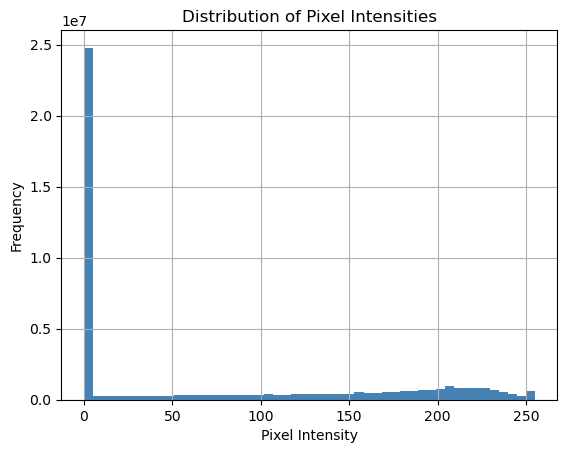

In [41]:
pixel_values = train_df.iloc[:, 1:].values.flatten()

# Plot histogram
plt.hist(pixel_values, bins=50, color='steelblue')
plt.title("Distribution of Pixel Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [42]:
train_df.isnull().values.any()

False

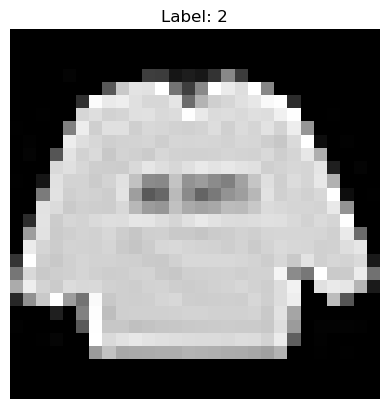

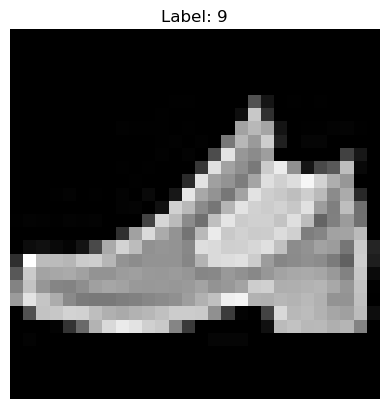

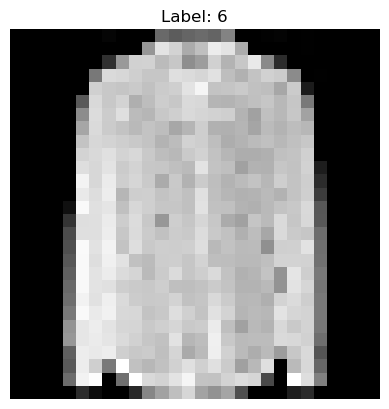

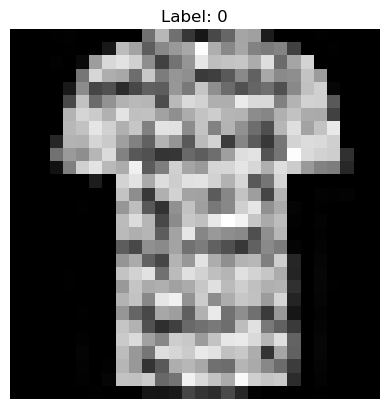

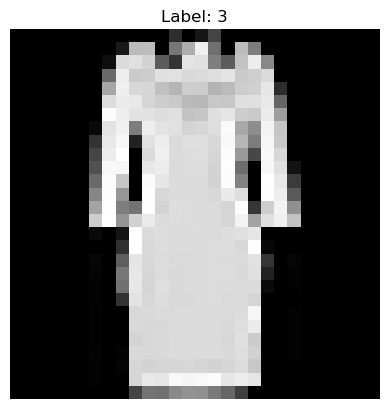

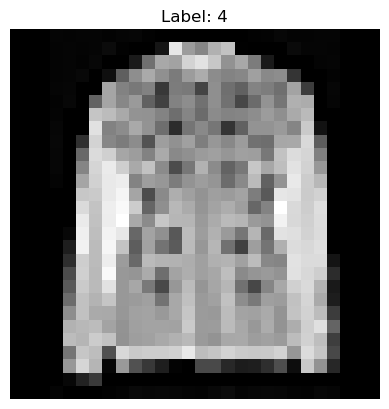

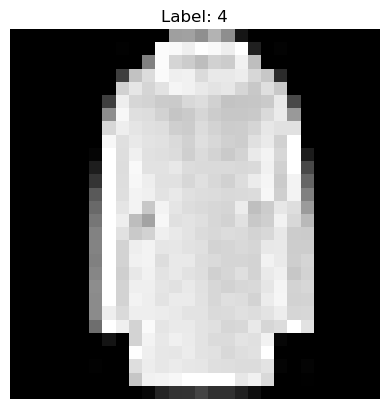

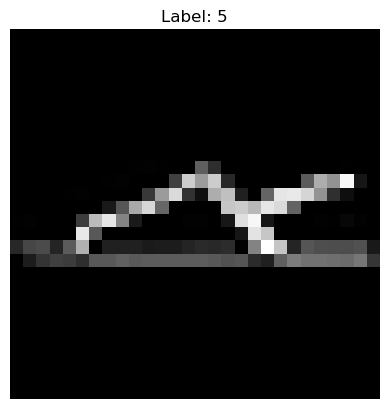

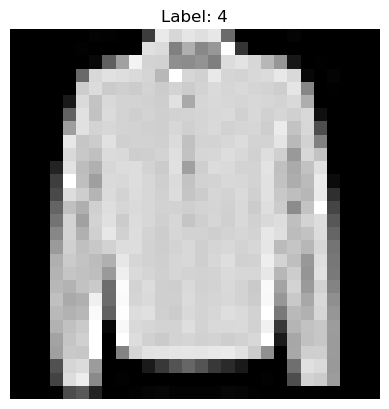

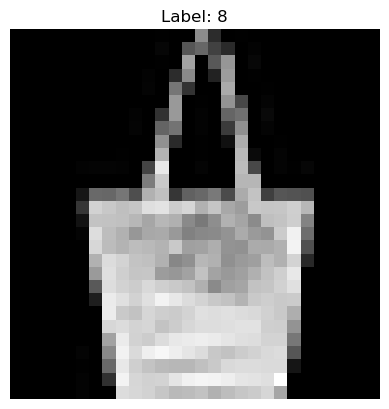

In [43]:
# Plot first 10
train_df.iloc[:, 0].value_counts()

for i in range(10):
    label = train_df.iloc[i, 0]
    pixels = train_df.iloc[i, 1:].values
    image = pixels.reshape(28, 28)

    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

In [44]:
# Counts of each class
train_df.iloc[:, 0].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [45]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


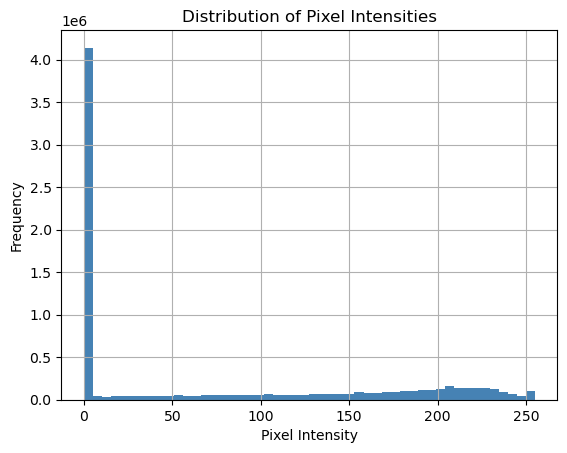

In [46]:
pixel_values = test_df.iloc[:, 1:].values.flatten()

# Plot density histogram
plt.hist(pixel_values, bins=50, color='steelblue')
plt.title("Distribution of Pixel Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [47]:
#check if missing values
test_df.isnull().values.any()

False

In [48]:
# Counts of each class
test_df.iloc[:, 0].value_counts()

0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64

In [49]:
X_train = train_df.iloc[:, 1:].values  # Pixel values
y_train = train_df.iloc[:, 0].values   # Labels

X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Normalize the pixel values (0-255 → 0-1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training samples: {X_train.shape}, Test samples: {X_test.shape}")

Training samples: (60000, 784), Test samples: (10000, 784)


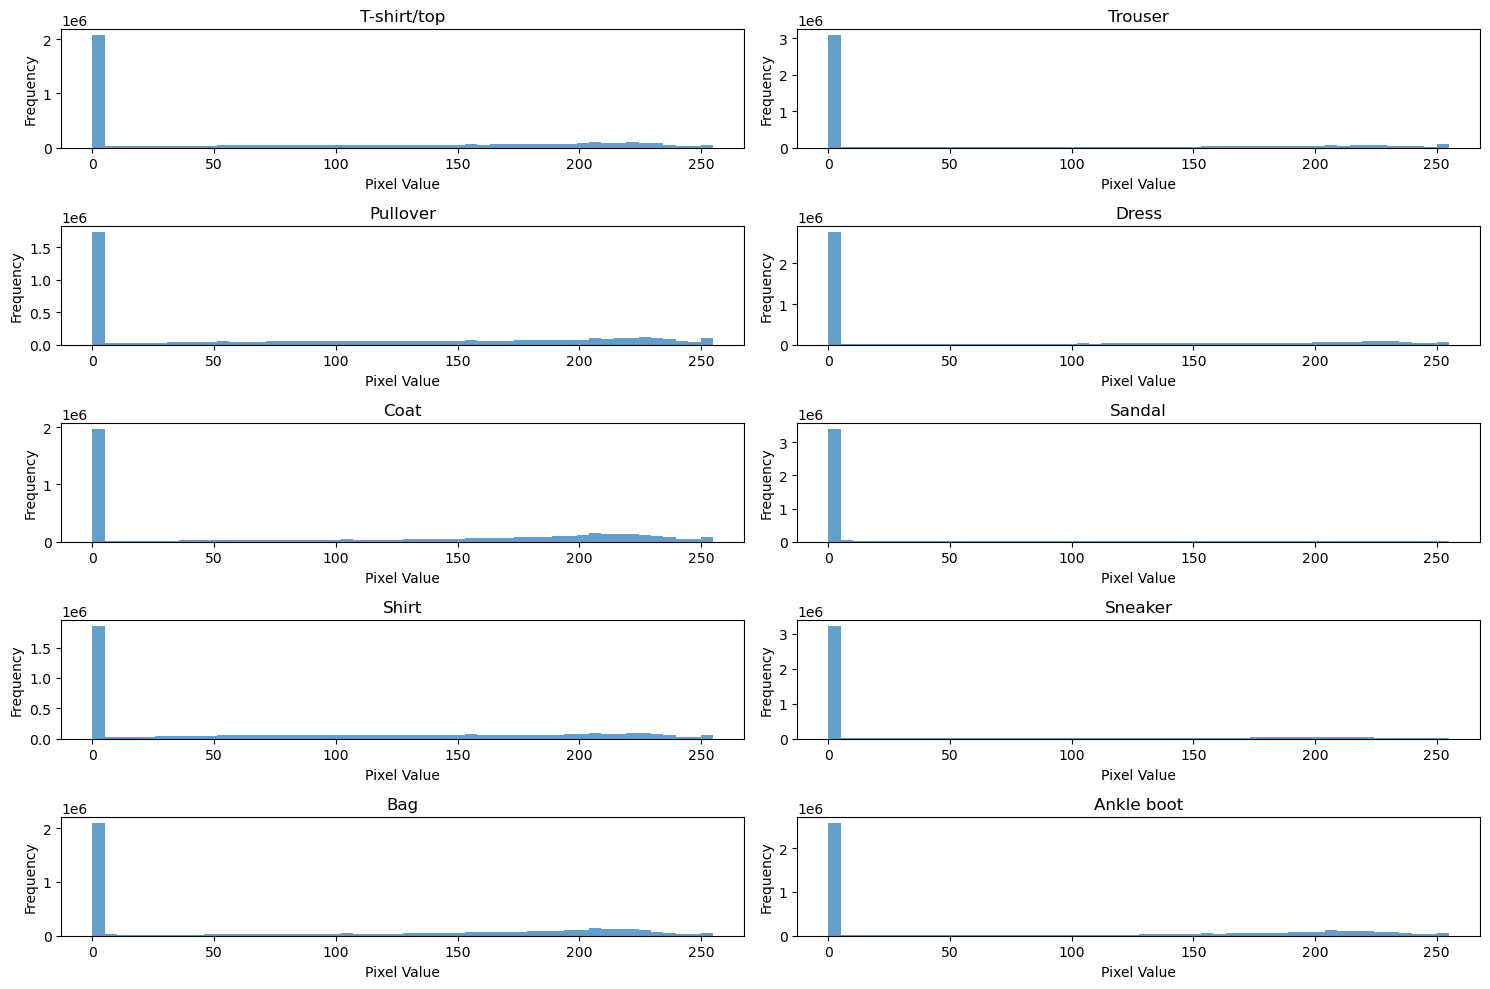

In [50]:
# Pixel distribution of each class
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_labels = train_df.iloc[:, 0].values  # first column = labels
train_images = train_df.iloc[:, 1:].values  # remaining columns = image pixels

plt.figure(figsize=(15, 10))

for i, class_name in enumerate(class_names):
    images_in_class = train_images[train_labels == i]
    pixel_values = images_in_class.flatten()

    plt.subplot(5, 2, i+1)
    plt.hist(pixel_values, bins=50, alpha=0.7)
    plt.title(class_name)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

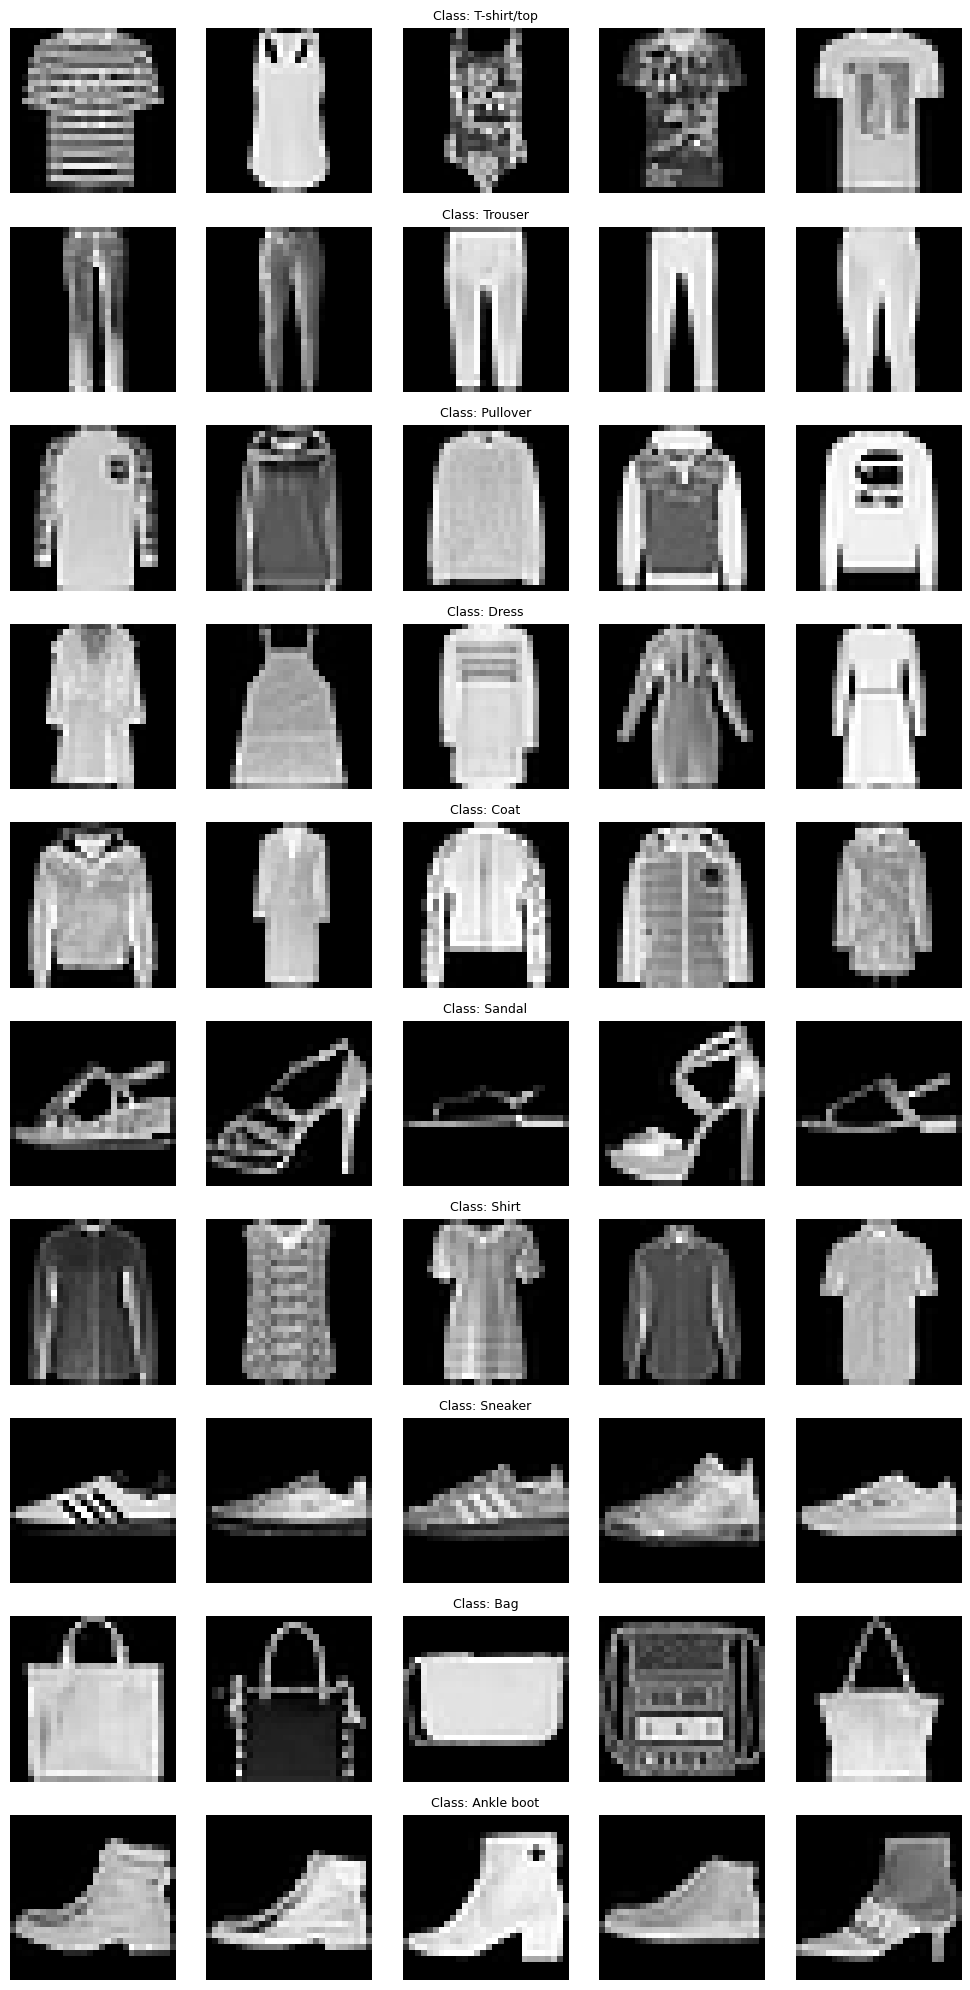

In [51]:
# 5 random ones from each class
plt.figure(figsize=(10, 20))

for label in range(10):
    # Find all indices for this class
    class_indices = np.where(train_labels == label)[0]
    
    # Randomly choose 5 unique indices from that class
    selected_indices = np.random.choice(class_indices, 5, replace=False)
    
    for i, idx in enumerate(selected_indices):
        plt.subplot(10, 5, label * 5 + i + 1)
        plt.imshow(train_images[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 2:  # center image in the row
            plt.title(f'Class: {class_names[label]}', fontsize=9)

plt.tight_layout()
plt.show()